# Ajuste del modelo de regulación de glucosa con retardo

Es necesario instalar el paquete ddeint ejecutando el siguiente comando en una terminal 
```
python -m pip install odeint
```

In [ ]:
import library as lb
import numpy as np
import matplotlib.pyplot as plt

### Loading experimental glucose data and best-fitting parameter sets for control and figh-fat-diet groups. 

Each row corresponds to an individual

In [3]:
t_data=[0,20,40,60,80,100,120]
popt_control = np.loadtxt("popt_control.txt")
glucose_control = np.loadtxt("glucose_control.txt")

popt_hfd = np.loadtxt("popt_hfd.txt")
glucose_hfd = np.loadtxt("glucose_hfd.txt")

### Plotting experimental data for control group

Text(0, 0.5, 'Glucose (normalized)')

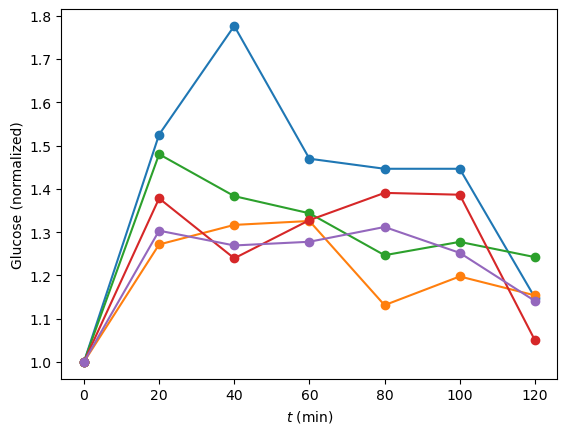

In [4]:
for i in range (5):
    glucose_data=glucose_control[i, :]
    plt.plot(t_data, glucose_data, 'o-')

plt.xlabel(r"$t$ (min)")
plt.ylabel(r"Glucose (normalized)")

### Plotting best-fitting model simulations

Change the value of variable i from 0 to 4 and excecute the cell to check all fits.

[0.05251268 0.07309603 0.09864941 9.69180411]


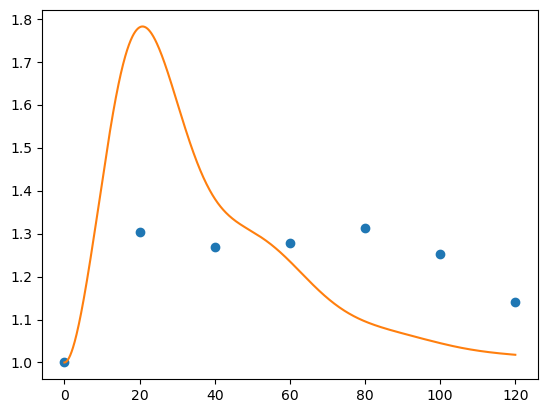

In [25]:
i=4
glucose_data=glucose_control[i, :]
popt = popt_control[i, :]

t_end = 120
bolus = 0.015
params = (bolus, *popt)
t, y = lb.solve_dde_equation(lb.glucose_regulation_model, t_end, lb.glucose_initial_history, params)

plt.plot(t_data, glucose_data, 'o')
plt.plot(t, y)

print(popt)

### Plotting experimental data for high-fat-diet group

Text(0, 0.5, 'Glucose (normalized)')

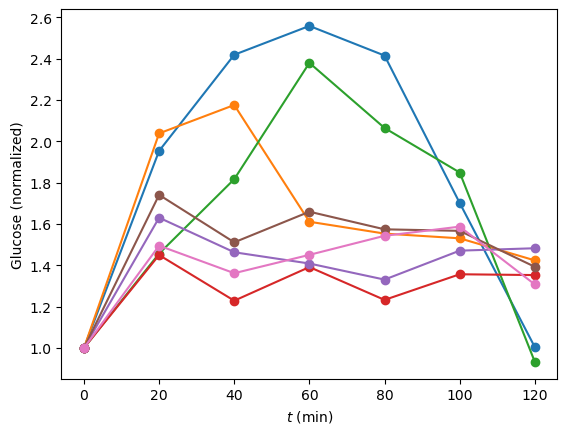

In [6]:
for i in range (7):
    glucose_data=glucose_hfd[i, :]
    plt.plot(t_data, glucose_data, 'o-')

plt.xlabel(r"$t$ (min)")
plt.ylabel(r"Glucose (normalized)")

### Plotting best-fitting model simulations

Change the value of variable i from 0 to 4 and excecute the cell to check all fits.

[0.03022602 0.08523827 0.08394773 6.55299282]


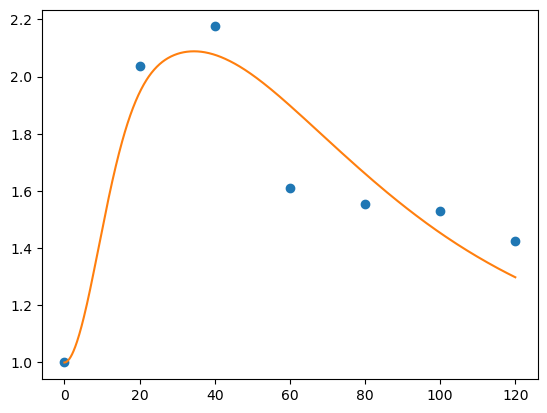

In [19]:
i=1
glucose_data=glucose_hfd[i, :]
popt = popt_hfd[i, :]

t_end = 120
bolus = 0.015
params = (bolus, *popt)
t, y = lb.solve_dde_equation(lb.glucose_regulation_model, t_end, lb.glucose_initial_history, params)

plt.plot(t_data, glucose_data, 'o')
plt.plot(t, y)

print(popt)

### Exercise

Compare the best-fitting parameter values for the control and high-fat-diet groups. Arrays popt_control and popt_hfd have the parameter values. Each row corresponds to an individual. The first, second, third and forth columns correspond to parameters absortion, glucose_rate, insulin_rate and delay.

### Plots of model simulations with different delay values

Text(0, 0.5, 'Glucose (normalized)')

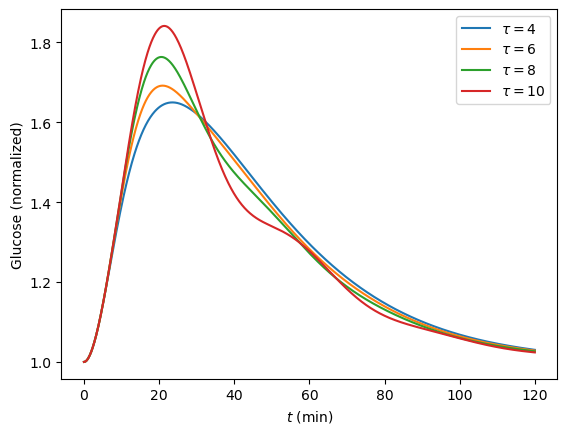

In [24]:
bolus = 0.015
absortion = 0.05
glucose_rate = 0.07
insulin_rate = 0.1
delay = [4, 6, 8, 10]

for d in delay:
    params = [bolus, absortion, glucose_rate, insulin_rate, d]
    t, y = lb.solve_dde_equation(lb.glucose_regulation_model, t_end, lb.glucose_initial_history, params)
    plt.plot(t, y, label=rf"$\tau=${d}")
plt.legend()
plt.xlabel(r"$t$ (min)")
plt.ylabel("Glucose (normalized)")

### Esxercise 

Make equivalent plots to understand the effect of the other 3 parameters.

### Exercise

Conclude